# Importing the Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [78]:
df = pd.read_csv('/content/Property Prices in Tunisia.csv')
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


# Droping 'Terrain et Fermes' Category

In [79]:
df = df[df['category'] != 'Terrains et Fermes']
df['category'].unique()

array(['Appartements', 'Locations de vacances',
       'Magasins, Commerces et Locaux industriels', 'Maisons et Villas',
       'Colocations', 'Bureaux et Plateaux'], dtype=object)

# Change 'Autres villes' in region with the mode

In [80]:
# Step 1: Filter out rows where the region is 'Autres villes' to compute the most frequent region
filtered_df = df[df['region'] != 'Autres villes']

# Step 2: Function to get the most frequent region
def most_frequent_region(series):
    return series.mode()[0]  # Get the first mode (most frequent value)

# Step 3: Group by city and create a mapping of cities to their most frequent regions
most_frequent_regions = filtered_df.groupby('city')['region'].agg(most_frequent_region).reset_index()
region_mapping = dict(zip(most_frequent_regions['city'], most_frequent_regions['region']))

# Step 4: Define a function to replace 'Autres villes' with the most frequent region or handle unknown cities
def replace_region(row):
    if row['region'] == 'Autres villes':
        if row['city'] in region_mapping:
            return region_mapping[row['city']]  # Replace with most frequent region
        else:
            return 'Unknown'  # Handle cases where city doesn't have a known frequent region
    else:
        return row['region']

# Step 5: Replace 'Autres villes' in the original DataFrame with the most frequent region
df['region'] = df.apply(replace_region, axis=1)
df['region'].unique()


array(['La Soukra', 'Ariana Ville', 'Borj Louzir', 'Chotrana',
       "Jardins D'el Menzah", 'Raoued', 'Ennasr', 'Ghazela', 'Ariana',
       'Sidi Thabet', 'Mnihla', 'Ettadhamen', 'Béja', 'Béja Nord',
       'Testour', 'Téboursouk', 'Amdoun', 'Medjez el-Bab', 'Béja Sud',
       'Medina Jedida', 'Fouchana', 'Mornag', 'Mégrine', 'El Mourouj',
       'Hammam Lif', 'Radès', 'Mohamedia', 'Boumhel', 'Ben arous',
       'Hammam Chott', 'Ezzahra', 'Bizerte', 'Bizerte Nord', 'Ras Jebel',
       'Mateur', 'Zarzouna', 'Ghar El Melh', 'Menzel Bourguiba',
       'Bizerte Sud', 'Gabès Médina', 'Gabès Sud', 'Gabès', 'Métouia',
       'Gabès Ouest', 'Mareth', 'Nouvelle Matmata', 'El Hamma',
       'Ghanouch', 'Gafsa Sud', 'Oum El Araies', 'Métlaoui', 'El Guettar',
       'Gafsa', 'Gafsa Nord', 'Tabarka', 'Jendouba', 'Bou Salem',
       'Ain Draham', 'Kairouan', 'Kairouan Sud', 'Kairouan Nord',
       'Sbikha', 'Haffouz', 'El Ouslatia', 'Chebika', 'Kasserine',
       'Sbiba', 'Kasserine Nord', 'Sbeïtla

# Feature Engineer : 'category_numeric' , 'log_size'  

In [81]:
df['category_numeric'] = pd.factorize(df['category'])[0]

# print the corresponding category_numeric for each unique category
category_mapping = dict(zip(df['category'].unique(), df['category_numeric'].unique()))
print(category_mapping)

{'Appartements': 0, 'Locations de vacances': 1, 'Magasins, Commerces et Locaux industriels': 2, 'Maisons et Villas': 3, 'Colocations': 4, 'Bureaux et Plateaux': 5}


In [82]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price,category_numeric
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,La Soukra,2.579784,0
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,La Soukra,1.845098,1
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449,0
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,Ariana,La Soukra,1.903090,1
6,Appartements,2.0,1.0,100.0,À Louer,670.0,Ariana,Borj Louzir,2.826075,0


# Data Types

In [83]:
print(df.dtypes)

category             object
room_count          float64
bathroom_count      float64
size                float64
type                 object
price               float64
city                 object
region               object
log_price           float64
category_numeric      int64
dtype: object


# Label_Encoding 'region' feature into region_numeric

In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'region' from categorical to numeric form using LabelEncoder
df['region_numeric'] = label_encoder.fit_transform(df['region'])
print('the number of available regions :', df['region_numeric'].unique().size)

the number of available regions : 212


# Print the corresponding region_number for each region

In [85]:
# Extract unique regions and their numeric equivalents
unique_regions = df[['region_numeric', 'region']].drop_duplicates()

# Temporarily display all rows
pd.set_option('display.max_rows', None)

# Display the unique region mappings
print(unique_regions)

# Reset to default display setting if necessary
pd.reset_option('display.max_rows')

       region_numeric                    region
2                 111                 La Soukra
4                   5              Ariana Ville
6                  17               Borj Louzir
12                 31                  Chotrana
13                 87       Jardins D'el Menzah
14                154                    Raoued
18                 56                    Ennasr
20                 74                   Ghazela
57                  4                    Ariana
72                184               Sidi Thabet
251               132                    Mnihla
505                58                Ettadhamen
2376               21                      Béja
2377               22                 Béja Nord
2390              201                   Testour
2391              206                Téboursouk
2396                3                    Amdoun
2401              125             Medjez el-Bab
2406               23                  Béja Sud
2437              124             Medina

# Encode the 'Type' Feature : 1 for a vendre and 0 for a louer


In [86]:
df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes
df['type'] = df['type'].astype(int)

df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price,category_numeric,region_numeric
2,Appartements,2.0,1.0,80.0,0,380.0,Ariana,La Soukra,2.579784,0,111
3,Locations de vacances,1.0,1.0,90.0,0,70.0,Ariana,La Soukra,1.845098,1,111
4,Appartements,2.0,2.0,113.0,1,170000.0,Ariana,Ariana Ville,5.230449,0,5
5,Locations de vacances,1.0,1.0,70.0,0,80.0,Ariana,La Soukra,1.903090,1,111
6,Appartements,2.0,1.0,100.0,0,670.0,Ariana,Borj Louzir,2.826075,0,17


# Split the existing df into 2 dfs, one for type=0 named:df_loan and other for df=1 named:df_sale


In [87]:
df_loan = df[df['type'] == 0]
df_sale = df[df['type'] == 1]
df_loan = df_loan.drop('type', axis=1)
df_sale = df_sale.drop('type', axis=1)

In [88]:
df_sale.head(10)

,category,room_count,bathroom_count,size,price,city,region,log_price,category_numeric,region_numeric
4,Appartements,2.0,2.0,113.0,170000.0,Ariana,Ariana Ville,5.230449,0,5
10,Maisons et Villas,4.0,2.0,1208.0,700000.0,Ariana,La Soukra,5.845098,3,111
13,Appartements,3.0,2.0,138.0,340000.0,Ariana,Jardins D'el Menzah,5.531479,0,87
14,Maisons et Villas,2.0,1.0,150.0,120000.0,Ariana,Raoued,5.079181,3,154
18,Appartements,2.0,1.0,80.0,230000.0,Ariana,Ennasr,5.361728,0,56
19,"Magasins, Commerces et Locaux industriels",1.0,1.0,20.0,55000.0,Ariana,Borj Louzir,4.740363,2,17
21,Appartements,4.0,2.0,200.0,440000.0,Ariana,Ennasr,5.643453,0,56
22,Maisons et Villas,4.0,2.0,130.0,125000.0,Ariana,La Soukra,5.096910,3,111
23,Maisons et Villas,2.0,1.0,150.0,170000.0,Ariana,Ghazela,5.230449,3,74
24,Appartements,4.0,1.0,160.0,310000.0,Ariana,La Soukra,5.491362,0,111


# Print the df_sale STATISTICS

In [89]:
df_sale.describe()


,room_count,bathroom_count,size,price,log_price,category_numeric,region_numeric
count,4343.000000,4343.000000,4343.000000,4.343000e+03,4343.000000,4343.000000,4343.000000
mean,3.190652,1.544324,218.871978,1.734471e+07,5.430219,1.654156,105.122726
std,1.858672,0.871951,216.060571,8.374313e+08,0.541682,1.491612,52.589897
min,1.000000,0.000000,20.000000,1.000000e+04,4.000000,0.000000,0.000000
25%,2.000000,1.000000,100.000000,1.400000e+05,5.146128,0.000000,74.000000
50%,3.000000,1.000000,140.000000,2.300000e+05,5.361728,2.000000,110.000000
75%,4.000000,2.000000,250.000000,4.000000e+05,5.602060,3.000000,139.000000
max,20.000000,10.000000,2000.000000,5.500000e+10,10.740363,5.000000,211.000000


# df_sale, 'Price' Visualizations

<Axes: xlabel='price'>

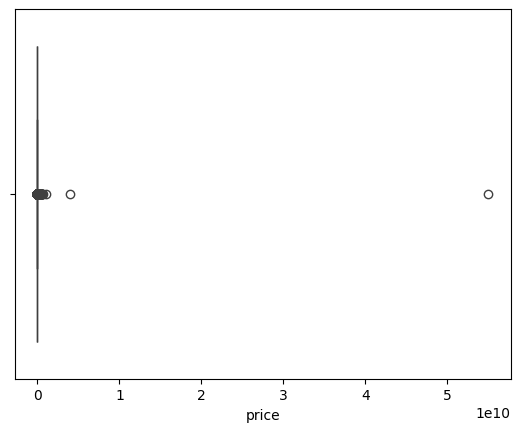

In [90]:
#boxplot of df_sale['price']
sns.boxplot(x=df_sale['price'])

## Delete Prices greater than 1 milliard (millimes)

In [91]:
df_sale1 = df_sale[(df_sale['price']<1e+6)]
print(len(df_sale))
print(len(df_sale1))
print('219 data points were deleted')

4343
4024
219 data points were deleted


## Boxplot of the Price

<Axes: xlabel='price'>

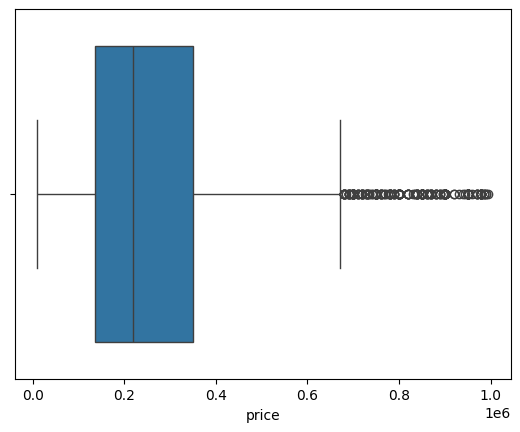

In [92]:
sns.boxplot(x=df_sale1['price'])

## Delete Prices less than 50 millions (millimes)

In [93]:
# print the number of data points having a price < 5e4
df_sale2 = df_sale1[df_sale1['price']<5e+4]
print("Number of deleted data points:" , len(df_sale2))

df_sale1 = df_sale1[df_sale1['price'] > 5e+4]
print("total number of data points after price regularization", len(df_sale1))


Number of deleted data points: 109
total number of data points after price regularization 3889


## Updated Box Plot, PRICE (df_sale1) between 50 millions and 1 milliard (millimes)

<Axes: xlabel='price'>

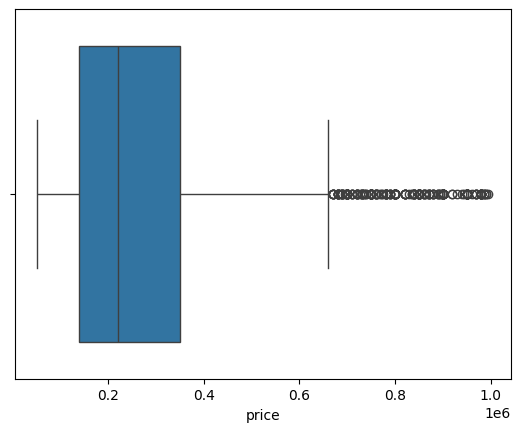

In [94]:
sns.boxplot(x=df_sale1['price'])

## Scatter Plots

<Axes: xlabel='size', ylabel='price'>

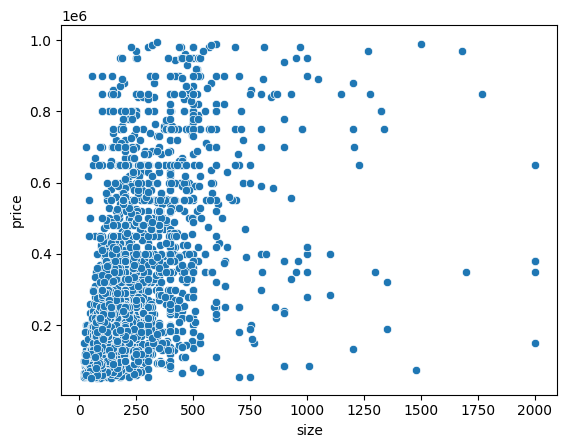

In [95]:
#scatter plot of price and the other features
sns.scatterplot(x=df_sale1['size'], y=df_sale1['price'])

<Axes: xlabel='room_count', ylabel='price'>

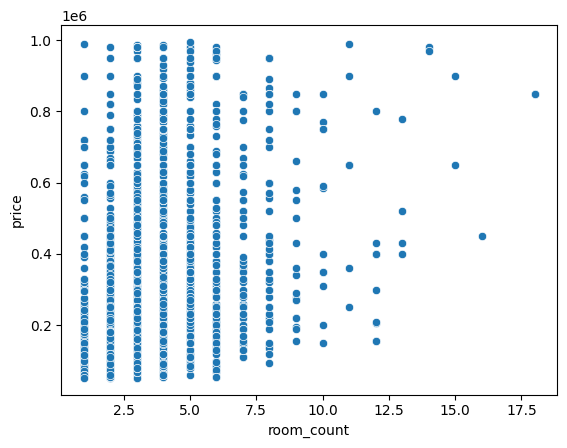

In [96]:
sns.scatterplot(x=df_sale1['room_count'], y=df_sale1['price'])

# Feature Engineering : 'size_per_room' , 'size_per_bathroom' to capture more insights between indep variables

In [97]:
# Compute size per room
df_sale1['size_per_room'] = df_sale1['size'] / df_sale1['room_count']

# Compute size per bathroom
df_sale1['size_per_bathroom'] = df_sale1['size'] / (df_sale1['bathroom_count'] + 1)

# Verify new features
print(df_sale1[['size', 'room_count', 'bathroom_count', 'size_per_room', 'size_per_bathroom']].head())


      size  room_count  bathroom_count  size_per_room  size_per_bathroom
4    113.0         2.0             2.0           56.5          37.666667
10  1208.0         4.0             2.0          302.0         402.666667
13   138.0         3.0             2.0           46.0          46.000000
14   150.0         2.0             1.0           75.0          75.000000
18    80.0         2.0             1.0           40.0          40.000000


# Correlation Matrix

                   room_count  bathroom_count      size     price  log_price  \
room_count           1.000000        0.612924  0.418315  0.381274   0.376415   
bathroom_count       0.612924        1.000000  0.339245  0.506749   0.486006   
size                 0.418315        0.339245  1.000000  0.521215   0.472913   
price                0.381274        0.506749  0.521215  1.000000   0.933879   
log_price            0.376415        0.486006  0.472913  0.933879   1.000000   
category_numeric     0.405380        0.219885  0.431280  0.210082   0.149890   
region_numeric      -0.010800       -0.003969  0.015509 -0.012926  -0.028194   
size_per_room       -0.119404        0.014915  0.712596  0.268109   0.229160   
size_per_bathroom    0.227623        0.010154  0.911500  0.351624   0.324103   

                   category_numeric  region_numeric  size_per_room  \
room_count                 0.405380       -0.010800      -0.119404   
bathroom_count             0.219885       -0.003969       0

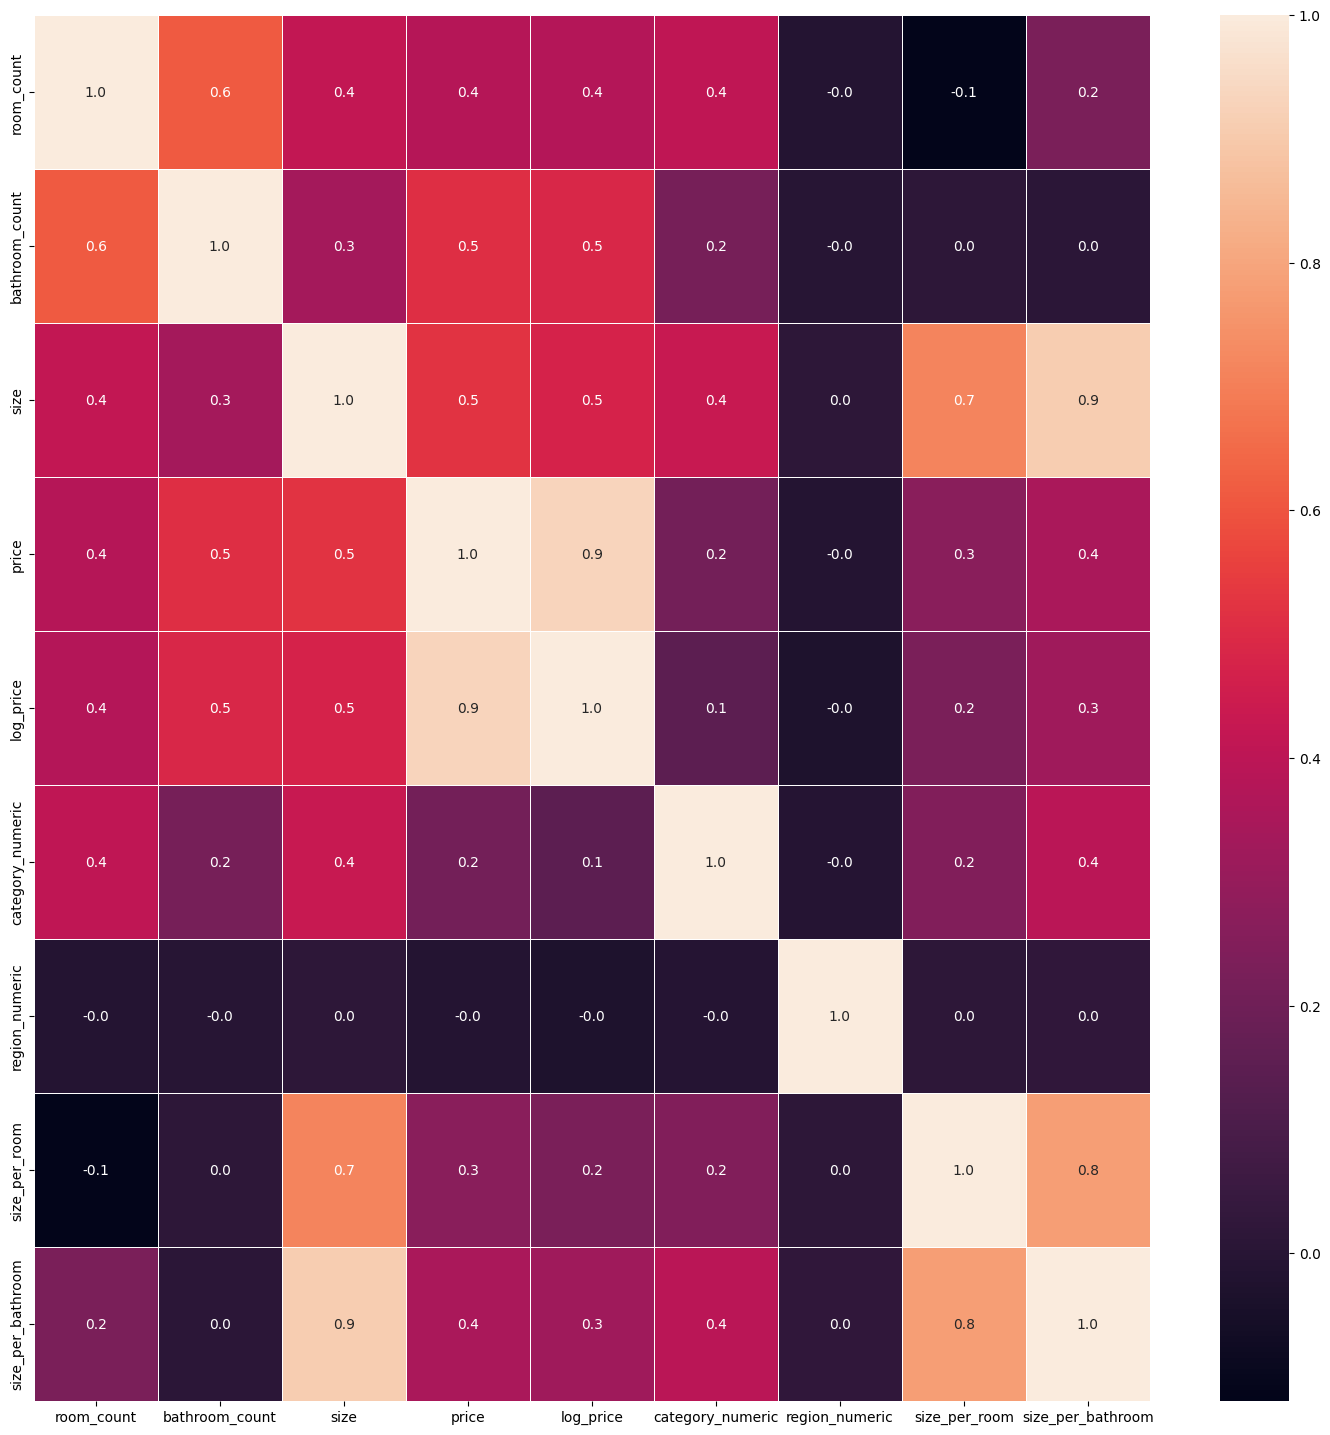

In [98]:
# retrive numeric columns
df_sale_numeric = df_sale1.select_dtypes(include=[float, int])
# Compute correlation matrix
sale_correlation_matrix = df_sale_numeric.corr()
print(sale_correlation_matrix)
f,ax = plt.subplots(figsize=(18, 18))
print(sns.heatmap(sale_correlation_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax))


# Drop 'log_price' variable

In [99]:
df_sale1 = df_sale1.drop('log_price', axis=1)
df_sale1.head(10)

,category,room_count,bathroom_count,size,price,city,region,category_numeric,region_numeric,size_per_room,size_per_bathroom
4,Appartements,2.0,2.0,113.0,170000.0,Ariana,Ariana Ville,0,5,56.5,37.666667
10,Maisons et Villas,4.0,2.0,1208.0,700000.0,Ariana,La Soukra,3,111,302.0,402.666667
13,Appartements,3.0,2.0,138.0,340000.0,Ariana,Jardins D'el Menzah,0,87,46.0,46.000000
14,Maisons et Villas,2.0,1.0,150.0,120000.0,Ariana,Raoued,3,154,75.0,75.000000
18,Appartements,2.0,1.0,80.0,230000.0,Ariana,Ennasr,0,56,40.0,40.000000
19,"Magasins, Commerces et Locaux industriels",1.0,1.0,20.0,55000.0,Ariana,Borj Louzir,2,17,20.0,10.000000
21,Appartements,4.0,2.0,200.0,440000.0,Ariana,Ennasr,0,56,50.0,66.666667
22,Maisons et Villas,4.0,2.0,130.0,125000.0,Ariana,La Soukra,3,111,32.5,43.333333
23,Maisons et Villas,2.0,1.0,150.0,170000.0,Ariana,Ghazela,3,74,75.0,75.000000
24,Appartements,4.0,1.0,160.0,310000.0,Ariana,La Soukra,0,111,40.0,80.000000


#Region Clustering (Enhancing the region_numeric correlation with price )

In [100]:
# Extract all unique region_numeric values from df_sale1
region_stats = pd.DataFrame({'region_numeric': df_sale1['region_numeric'].unique()})

# Calculate the statistics for each region_numeric
region_stats['avg_price'] = region_stats['region_numeric'].apply(
    lambda x: df_sale1[df_sale1['region_numeric'] == x]['price'].mean()
)
region_stats['median_price'] = region_stats['region_numeric'].apply(
    lambda x: df_sale1[df_sale1['region_numeric'] == x]['price'].median()
)
region_stats['price_std'] = region_stats['region_numeric'].apply(
    lambda x: df_sale1[df_sale1['region_numeric'] == x]['price'].std()
)
region_stats['avg_size'] = region_stats['region_numeric'].apply(
    lambda x: df_sale1[df_sale1['region_numeric'] == x]['size'].mean()
)
region_stats['avg_room_count'] = region_stats['region_numeric'].apply(
    lambda x: df_sale1[df_sale1['region_numeric'] == x]['room_count'].mean()
)
region_stats['property_count'] = region_stats['region_numeric'].apply(
    lambda x: df_sale1[df_sale1['region_numeric'] == x].shape[0]
)

# Print to verify the results
print(region_stats.head())



   region_numeric      avg_price  median_price      price_std    avg_size  \
0               5  291166.666667      249000.0  204700.558965  160.333333   
1             111  357811.659193      290000.0  236032.059871  195.071749   
2              87  323140.625000      280000.0  180587.611394  172.583333   
3             154  168276.315789      125000.0  120866.273066  199.907895   
4              56  329368.320000      310000.0  151779.927643  147.184000   

   avg_room_count  property_count  
0         3.25000              24  
1         3.06278             223  
2         3.18750              48  
3         3.25000              76  
4         2.65600             125  


In [101]:
# Check for missing values in the original `region_stats` dataframe
print(region_stats.isnull().sum())

# Fill missing values with the mean for numerical features
region_stats.fillna(region_stats.mean(), inplace=True)

# Verify that there are no more missing values
print(region_stats.isnull().sum())


region_numeric     0
avg_price          0
median_price       0
price_std         38
avg_size           0
avg_room_count     0
property_count     0
dtype: int64
region_numeric    0
avg_price         0
median_price      0
price_std         0
avg_size          0
avg_room_count    0
property_count    0
dtype: int64


In [102]:
from sklearn.preprocessing import StandardScaler

# Select features to be scaled for clustering
features_for_clustering = ['avg_price', 'median_price', 'price_std', 'avg_size', 'avg_room_count', 'property_count']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
scaled_features = scaler.fit_transform(region_stats[features_for_clustering])

# Print the scaled features
print("Scaled features:\n", scaled_features[:5])


Scaled features:
 [[ 0.40181696  0.26904459  0.91923407 -0.55749149 -0.36797437  0.08268753]
 [ 0.92110355  0.58671814  1.34379953 -0.28740537 -0.51101991  4.60480293]
 [ 0.65095267  0.50923679  0.59248545 -0.46224952 -0.4157276   0.62806828]
 [-0.55572402 -0.6917242  -0.21678372 -0.24980504 -0.36797437  1.26434582]
 [ 0.69947782  0.74168085  0.20211961 -0.65972564 -0.82182102  2.37783152]]


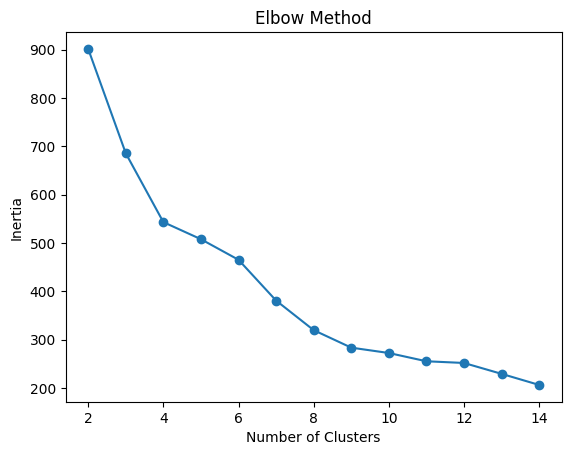

In [103]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(2, 15)  # Test clusters from 2 to 15
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## Map each region to a cluster based on region_stats

In [105]:
# Apply K-Means with the chosen number of clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
region_stats['region_cluster'] = kmeans.fit_predict(scaled_features)

# Check the first few rows with cluster labels
print(region_stats[['region_numeric', 'region_cluster']].head(10))


   region_numeric  region_cluster
0               5               7
1             111               2
2              87               7
3             154               7
4              56               7
5              17               6
6              74               7
7              31               7
8               4               7
9             184               5


## Add the region_cluster to the df_sale1 dataframe

In [106]:
# Merge region cluster labels into df_sale1
df_sale1 = df_sale1.merge(region_stats[['region_numeric', 'region_cluster']], on='region_numeric', how='left')
# Drop unnecessary region_cluster columns if they exist
df_sale1 = df_sale1.drop(columns=['region_cluster_x', 'region_cluster_y'], errors='ignore')

df_sale1

,category,room_count,bathroom_count,size,price,city,region,category_numeric,region_numeric,size_per_room,size_per_bathroom,region_cluster
0,Appartements,2.0,2.0,113.0,170000.0,Ariana,Ariana Ville,0,5,56.500000,37.666667,7
1,Maisons et Villas,4.0,2.0,1208.0,700000.0,Ariana,La Soukra,3,111,302.000000,402.666667,2
2,Appartements,3.0,2.0,138.0,340000.0,Ariana,Jardins D'el Menzah,0,87,46.000000,46.000000,7
3,Maisons et Villas,2.0,1.0,150.0,120000.0,Ariana,Raoued,3,154,75.000000,75.000000,7
4,Appartements,2.0,1.0,80.0,230000.0,Ariana,Ennasr,0,56,40.000000,40.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,Appartements,3.0,1.0,104.0,160000.0,Tunis,Hraïria,0,86,34.666667,52.000000,6
3885,"Magasins, Commerces et Locaux industriels",1.0,1.0,29.0,115000.0,Tunis,Le Kram,2,114,29.000000,14.500000,7
3886,Appartements,2.0,1.0,68.0,110000.0,Tunis,Centre Urbain Nord,0,27,34.000000,34.000000,7
3887,Appartements,2.0,1.0,140.0,250000.0,Tunis,Tunis,0,204,70.000000,70.000000,7


## Print the average price for each cluster

In [107]:
cluster_avg_price = df_sale1.groupby('region_cluster')['price'].mean().reset_index()
print(cluster_avg_price)

   region_cluster          price
0               0  197464.121212
1               1  376394.788274
2               2  323155.843175
3               3  750000.000000
4               4  244375.000000
5               5  301509.090909
6               6  160842.983444
7               7  271754.005741
8               8  970000.000000
9               9  194827.586207


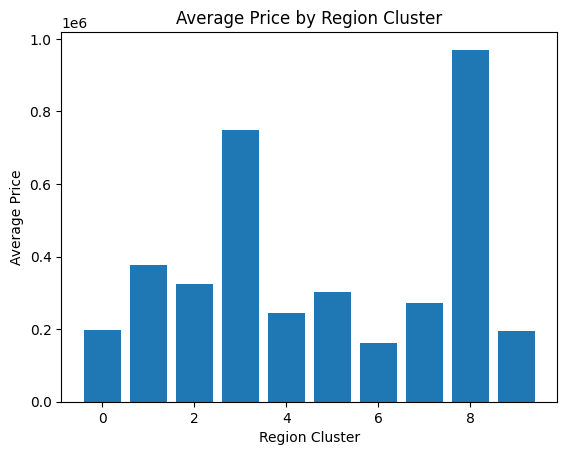

In [108]:
import matplotlib.pyplot as plt

plt.bar(cluster_avg_price['region_cluster'], cluster_avg_price['price'])
plt.xlabel('Region Cluster')
plt.ylabel('Average Price')
plt.title('Average Price by Region Cluster')
plt.show()


# Calculate the new correlation between Region and price

In [109]:
# Calculate the correlation between price and region_cluster
correlation = df_sale1['price'].corr(df_sale1['region_cluster'])
print(f"Correlation between price and region_cluster: {correlation}")

Correlation between price and region_cluster: -0.1133142022573088


In [112]:
df_sale1.columns

Index(['category', 'room_count', 'bathroom_count', 'size', 'price', 'city',
       'region', 'category_numeric', 'region_numeric', 'size_per_room',
       'size_per_bathroom', 'region_cluster'],
      dtype='object')

# Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Select the features for the model
X = df_sale1[[ 'size', 'room_count', 'bathroom_count', 'region_cluster', 'category_numeric', 'size_per_room', 'size_per_bathroom']]

# Target variable (price)
y = df_sale1['price']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# View model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output model details
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Model R-squared on test data:", model.score(X_test, y_test))
print("RMSE on test data:", rmse)


Coefficients: [ 6.97643521e+02 -1.02644912e+03  7.68981859e+04 -4.09669287e+03
 -6.84083352e+03 -7.53133039e+01 -5.93889760e+02]
Intercept: 110832.30039939121
Model R-squared on test data: 0.3764891917689489
RMSE on test data: 150316.38349766211


# Lasso / Ridge Regression

In [114]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize Lasso and Ridge models
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value for regularization strength
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization strength

# Train the Lasso model
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Train the Ridge model
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE for Lasso and Ridge models
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Output model details for Lasso
print("Lasso Regression:")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Model R-squared on test data:", lasso_model.score(X_test, y_test))
print("RMSE on test data:", rmse_lasso)

# Output model details for Ridge
print("\nRidge Regression:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Model R-squared on test data:", ridge_model.score(X_test, y_test))
print("RMSE on test data:", rmse_ridge)


Lasso Regression:
Coefficients: [ 6.97673488e+02 -1.02448065e+03  7.68916290e+04 -4.09659847e+03
 -6.84041726e+03 -7.52681661e+01 -5.94004004e+02]
Intercept: 110834.95635895949
Model R-squared on test data: 0.37648693847120995
RMSE on test data: 150316.65511064508

Ridge Regression:
Coefficients: [ 6.98466528e+02 -9.98205744e+02  7.67602663e+04 -4.09785069e+03
 -6.83965627e+03 -7.46940792e+01 -5.96418592e+02]
Intercept: 110949.75056375074
Model R-squared on test data: 0.3764440795422682
RMSE on test data: 150321.82124150274


# Classification : predict the price category (Low, Mid, or High)

## Distribution of price variable

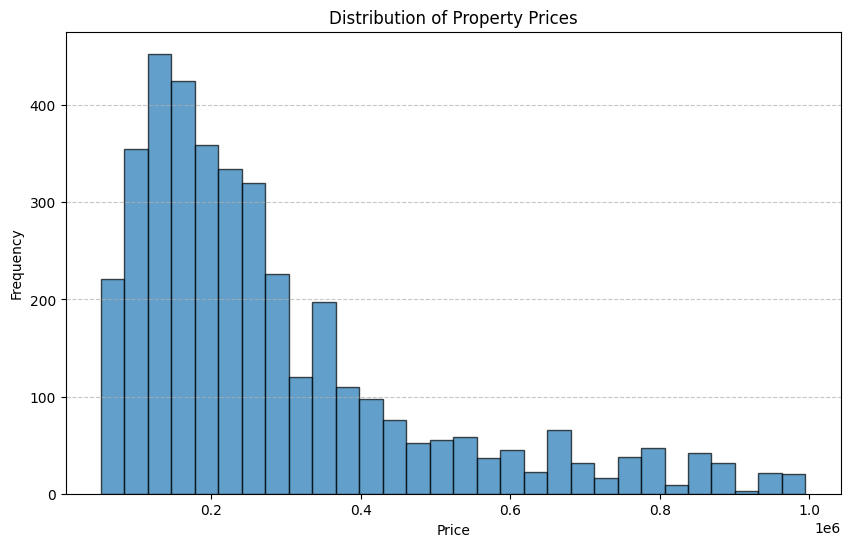

In [115]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sale1['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Price binning

In [116]:
df_sale2 = df_sale1.copy()

In [117]:
# Create bins for the price variable
bins = [0, 150000, 350000, df_sale1['price'].max()]
labels = ['Low Price', 'Mid Price', 'High Price']
df_sale2['price_category'] = pd.cut(df_sale1['price'], bins=bins, labels=labels, include_lowest=True)

# Verify the distribution of classes
print(df_sale2['price_category'].value_counts())


price_category
Mid Price     1811
Low Price     1146
High Price     932
Name: count, dtype: int64


## Preparing for the Classification model

In [118]:
# Get the list of existing columns in the DataFrame
existing_columns = df_sale2.columns.tolist()

# Columns to drop
columns_to_drop = ['category', 'city', 'region', 'price']

# Filter columns_to_drop to only include columns that exist in the DataFrame
valid_columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop only the valid columns
if valid_columns_to_drop:
    df_sale2 = df_sale2.drop(columns=valid_columns_to_drop)
else:
    print("None of the specified columns were found in the DataFrame.")

In [119]:
print(df_sale2.columns.tolist())

['room_count', 'bathroom_count', 'size', 'category_numeric', 'region_numeric', 'size_per_room', 'size_per_bathroom', 'region_cluster', 'price_category']


In [120]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_sale2.drop(columns=[ 'price_category'])
y = df_sale2['price_category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with class weights
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

  High Price       0.62      0.70      0.66       187
   Low Price       0.48      0.77      0.59       229
   Mid Price       0.60      0.34      0.43       362

    accuracy                           0.55       778
   macro avg       0.57      0.60      0.56       778
weighted avg       0.57      0.55      0.53       778



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [122]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Oversample using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate
y_pred = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred))


Random Forest Report:
              precision    recall  f1-score   support

  High Price       0.74      0.73      0.74       187
   Low Price       0.64      0.71      0.67       229
   Mid Price       0.70      0.66      0.68       362

    accuracy                           0.69       778
   macro avg       0.70      0.70      0.70       778
weighted avg       0.69      0.69      0.69       778



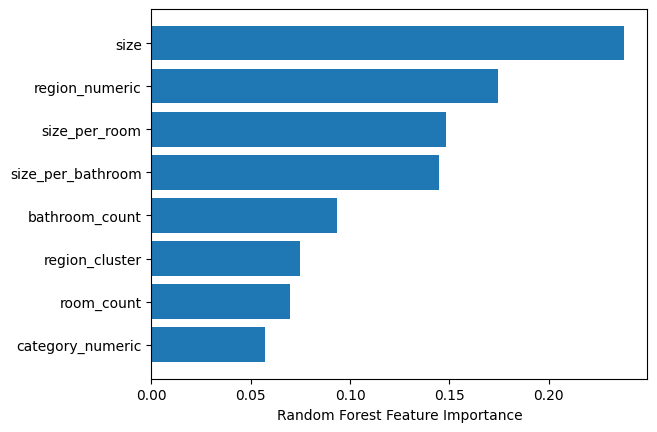

In [123]:
import matplotlib.pyplot as plt
feature_importances = rf.feature_importances_
features = X_train.columns
sorted_idx = feature_importances.argsort()

plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [124]:
pip install xgboost

## XG_BOOST

XGBoost Classification Report:
              precision    recall  f1-score   support

  High Price       0.69      0.75      0.72       187
   Low Price       0.66      0.75      0.70       229
   Mid Price       0.73      0.63      0.68       362

    accuracy                           0.70       778
   macro avg       0.69      0.71      0.70       778
weighted avg       0.70      0.70      0.69       778

Confusion Matrix:
[[140   9  38]
 [ 10 172  47]
 [ 53  80 229]]


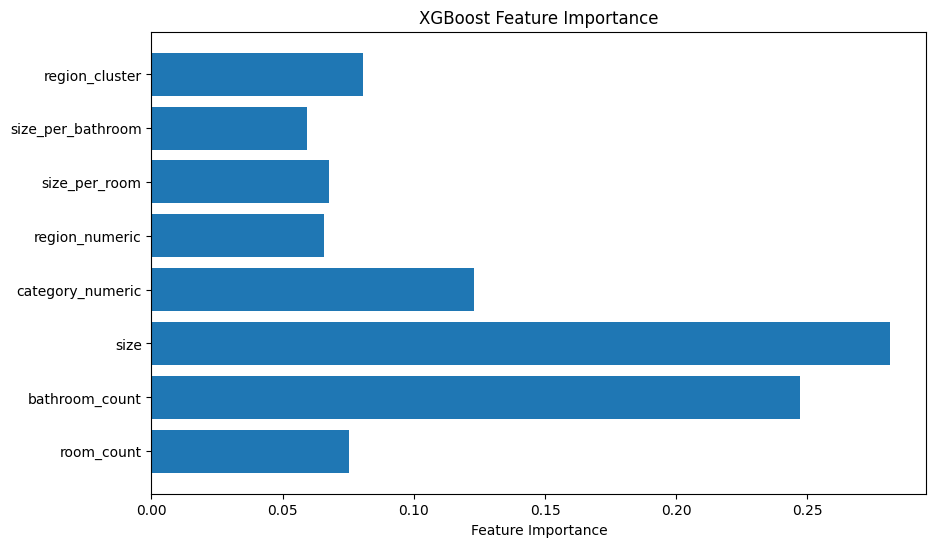

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Encode Target Labels
label_encoder = LabelEncoder()
y_train_resampled = label_encoder.fit_transform(y_train_resampled)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)                   # Encode test labels

# Step 3: Train XGBoost Classifier
xgb = XGBClassifier(
    random_state=42,
    max_depth=6,            # Controls the maximum depth of each tree
    learning_rate=0.1,      # Learning rate (step size)
    n_estimators=100,       # Number of boosting rounds (trees)
    objective='multi:softmax',  # For multi-class classification
    eval_metric='mlogloss'  # Multi-class log-loss metric
)

xgb.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate on the Test Set
y_pred = xgb.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)  # Decode predictions back to original labels

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_decoded, labels=label_encoder.classes_)
print("Confusion Matrix:")
print(cm)

# Step 5: Optional - Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, xgb.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


## Tuning XG BOOST Hyperparameters using the grid_search method

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(XGBClassifier(objective='multi:softmax', eval_metric='mlogloss'),
                           param_grid,
                           scoring='f1_weighted',
                           cv=3,
                           verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200}


## Retraining the XG boost with the best parameters

Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

  High Price       0.72      0.73      0.73       187
   Low Price       0.69      0.76      0.72       229
   Mid Price       0.72      0.67      0.70       362

    accuracy                           0.71       778
   macro avg       0.71      0.72      0.72       778
weighted avg       0.71      0.71      0.71       778

Confusion Matrix:
[[137   7  43]
 [  5 175  49]
 [ 47  73 242]]


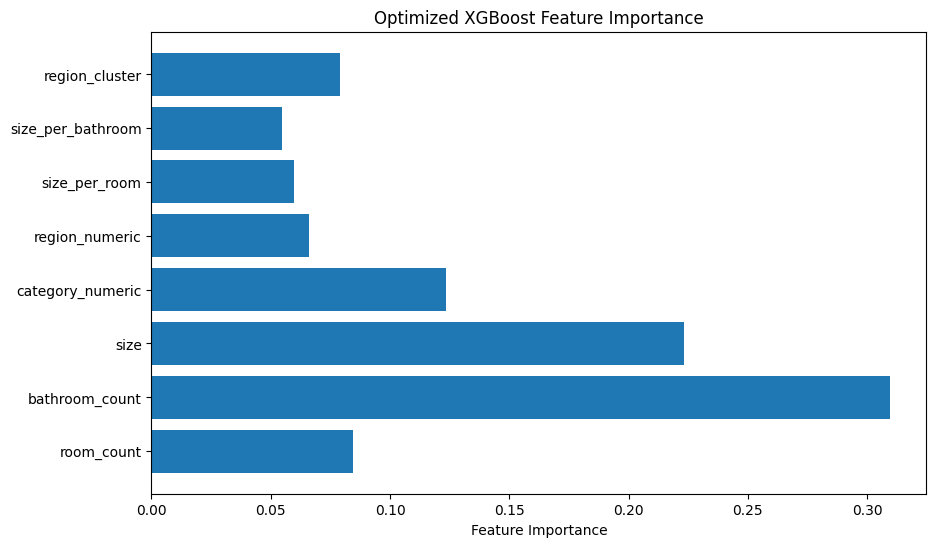

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Retrain XGBoost with best parameters
xgb_optimized = XGBClassifier(
    random_state=42,
    max_depth=8,             # Best parameter
    learning_rate=0.1,       # Best parameter
    n_estimators=200,        # Best parameter
    min_child_weight=5,      # Best parameter
    objective='multi:softmax',  # Multi-class classification
    eval_metric='mlogloss'   # Multi-class log-loss
)

xgb_optimized.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_optimized.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_decoded, labels=label_encoder.classes_)
print("Confusion Matrix:")
print(cm)

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, xgb_optimized.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Optimized XGBoost Feature Importance")
plt.show()


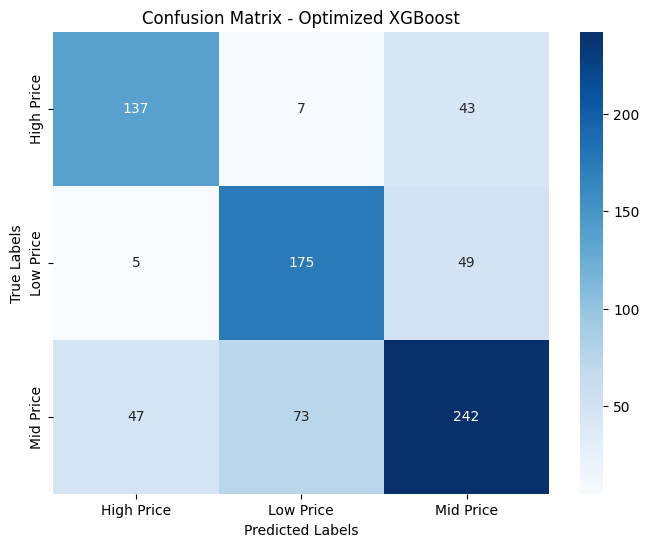

In [129]:
# Optional: Plot Confusion Matrix (visual representation)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Optimized XGBoost')
plt.show()



In [149]:
# Add 'price' column from df_sale1 to df_sale2
df_sale2['price'] = df_sale1['price']


In [150]:
df_sale2

,room_count,bathroom_count,size,category_numeric,region_numeric,size_per_room,size_per_bathroom,region_cluster,price_category,price
0,2.0,2.0,113.0,0,5,56.500000,37.666667,7,Mid Price,170000.0
1,4.0,2.0,1208.0,3,111,302.000000,402.666667,2,High Price,700000.0
2,3.0,2.0,138.0,0,87,46.000000,46.000000,7,Mid Price,340000.0
3,2.0,1.0,150.0,3,154,75.000000,75.000000,7,Low Price,120000.0
4,2.0,1.0,80.0,0,56,40.000000,40.000000,7,Mid Price,230000.0
...,...,...,...,...,...,...,...,...,...,...
3884,3.0,1.0,104.0,0,86,34.666667,52.000000,6,Mid Price,160000.0
3885,1.0,1.0,29.0,2,114,29.000000,14.500000,7,Low Price,115000.0
3886,2.0,1.0,68.0,0,27,34.000000,34.000000,7,Low Price,110000.0
3887,2.0,1.0,140.0,0,204,70.000000,70.000000,7,Mid Price,250000.0


# Predicting price value for each price category (low, mid, high)

In [151]:
df_low = df_sale2[df_sale2['price_category'] == 'Low Price']
df_mid = df_sale2[df_sale2['price_category'] == 'Mid Price']
df_high = df_sale2[df_sale2['price_category'] == 'High Price']

In [152]:
print("Low Price DataFrame Shape:", df_low.shape)
print("Mid Price DataFrame Shape:", df_mid.shape)
print("High Price DataFrame Shape:", df_high.shape)


Low Price DataFrame Shape: (1146, 10)
Mid Price DataFrame Shape: (1811, 10)
High Price DataFrame Shape: (932, 10)


In [154]:
ridge_low.fit(df_low[features], df_low['price'])
ridge_mid.fit(df_mid[features], df_mid['price'])
ridge_high.fit(df_high[features], df_high['price'])


Ridge(random_state=42)

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X, y_true, category):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{category} Price Category:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}\n")

evaluate_model(ridge_low, df_low[features], df_low['price'], 'Low')
evaluate_model(ridge_mid, df_mid[features], df_mid['price'], 'Mid')
evaluate_model(ridge_high, df_high[features], df_high['price'], 'High')


Low Price Category:
RMSE: 26496.498386470786
MAE: 22556.479652527087
R²: 0.06540072027636223

Mid Price Category:
RMSE: 52407.86596331367
MAE: 43471.239553407286
R²: 0.14717600193387026

High Price Category:
RMSE: 161782.0467773999
MAE: 132048.0661174291
R²: 0.1832243736809983



**Unsuccefull price prediction !!! Model Accuracy is too low !!**

In [163]:
# drop price from df_sale2
df_sale2.drop(columns=['price'])

,room_count,bathroom_count,size,category_numeric,region_numeric,size_per_room,size_per_bathroom,region_cluster,price_category
0,2.0,2.0,113.0,0,5,56.500000,37.666667,7,Mid Price
1,4.0,2.0,1208.0,3,111,302.000000,402.666667,2,High Price
2,3.0,2.0,138.0,0,87,46.000000,46.000000,7,Mid Price
3,2.0,1.0,150.0,3,154,75.000000,75.000000,7,Low Price
4,2.0,1.0,80.0,0,56,40.000000,40.000000,7,Mid Price
...,...,...,...,...,...,...,...,...,...
3884,3.0,1.0,104.0,0,86,34.666667,52.000000,6,Mid Price
3885,1.0,1.0,29.0,2,114,29.000000,14.500000,7,Low Price
3886,2.0,1.0,68.0,0,27,34.000000,34.000000,7,Low Price
3887,2.0,1.0,140.0,0,204,70.000000,70.000000,7,Mid Price


# Preparing Deployment

In [168]:
# Display statistics for numerical features
print("Numerical Feature Ranges:")
print(df_sale2.describe())

# Display unique values for categorical features
print("\nUnique Values for Categorical Features:")
categorical_features = ['category_numeric', 'region_numeric']
for feature in categorical_features:
    print(f"{feature}: {df[feature].unique()}")


Numerical Feature Ranges:
        room_count  bathroom_count         size  category_numeric  \
count  3889.000000     3889.000000  3889.000000       3889.000000   
mean      3.130882        1.503471   202.326819          1.572384   
std       1.734750        0.802549   184.634570          1.503072   
min       1.000000        0.000000    20.000000          0.000000   
25%       2.000000        1.000000   100.000000          0.000000   
50%       3.000000        1.000000   140.000000          2.000000   
75%       4.000000        2.000000   240.000000          3.000000   
max      18.000000       10.000000  2000.000000          5.000000   

       region_numeric  size_per_room  size_per_bathroom  region_cluster  \
count     3889.000000    3889.000000        3889.000000     3889.000000   
mean       104.637182      68.697452          80.587326        4.678323   
std         52.692560      61.602638          71.036686        2.686298   
min          0.000000       7.500000          10.000

In [156]:
print(X_train.columns)


Index(['room_count', 'bathroom_count', 'size', 'category_numeric',
       'region_numeric', 'size_per_room', 'size_per_bathroom',
       'region_cluster'],
      dtype='object')


#Model Deployment

In [165]:
import joblib

# Save the updated XGBoost classification model
joblib.dump(xgb_optimized, 'xgb_classification_model_updated.pkl')

print("Updated model saved successfully as 'xgb_classification_model_updated.pkl'!")


Updated model saved successfully as 'xgb_classification_model_updated.pkl'!


In [166]:
# Load the saved model
xgb_loaded_model = joblib.load('xgb_classification_model_updated.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [167]:
# Test the loaded model
sample_test_data = X_test.iloc[:5]  # Select a small sample of test data
sample_predictions = xgb_loaded_model.predict(sample_test_data)

# Display predictions
print("Sample Test Data Predictions:", sample_predictions)

# Decode predictions back to their original labels if necessary
sample_predictions_decoded = label_encoder.inverse_transform(sample_predictions)
print("Decoded Predictions:", sample_predictions_decoded)


Sample Test Data Predictions: [1 2 0 1 2]
Decoded Predictions: ['Low Price' 'Mid Price' 'High Price' 'Low Price' 'Mid Price']
